In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#tf.enable_eager_execution()#

**1.3**

In [12]:
tf.nn.relu
tf.nn.sigmoid
tf.tensordot

<function tensorflow.python.ops.math_ops.tensordot>

In [13]:
def nn_layer(x, w, b, f):
  return f(tf.tensordot(x, w, axes = 1) + b)

def nn_2layers(x, params, f_hidden, f_out):
    h = nn_layer(x, params[0], params[1], f_hidden)
    y_hat = nn_layer(h, params[2], params[3], f_out)
    return y_hat

**1.4**

In [14]:

w1 = tf.constant([[1, -1, 0, 1], [0, 0, 0.5, 1]], dtype = tf.float32) 
b1 = tf.constant([0, 0, 1, 0], dtype = tf.float32) 
w2 = tf.constant([1, 0, -1, 1], dtype = tf.float32) 
b2 = tf.constant([1], dtype = tf.float32) 
x = tf.constant([[1, -1], [0, -1], [0, 1]], dtype = tf.float32) 
yhat = nn_2layers(x, [w1, b1, w2, b2], tf.nn.relu, tf.nn.sigmoid)
print(yhat)
print(yhat.numpy().squeeze())

tf.Tensor([0.81757444 0.6224593  0.6224593 ], shape=(3,), dtype=float32)
[0.81757444 0.6224593  0.6224593 ]


**2.2**

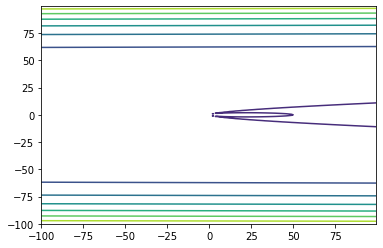

In [32]:
delta = 0.5
x = np.arange(-100.0, 100.0, delta)
y = np.arange(-100.0, 100.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3 - X ** 3) + 50 * ((2 * (Y ** 2) - X) ** 2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

**2.3**

In [40]:
def grad_f(vector):
    x, y = vector
    df_dx = -3 * (x ** 2) + 100 * x - 200 * (y ** 2)
    df_dy = 800 * (y ** 3) - 400 * x * y
    return np.array([df_dx, df_dy])

In [41]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-100, 100, size = 2)
    else:
        point = starting_point
        
    traj = [point]
    for _ in range(iterations):
        grad = grad_f(point)
        point = point -learning_rate * grad
        traj.append(point)
    return np.array(traj)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


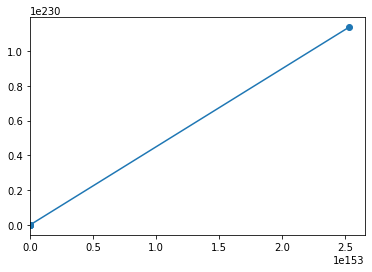

In [42]:
np.random.seed(20)
traj = grad_descent(iterations=100, learning_rate=.1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


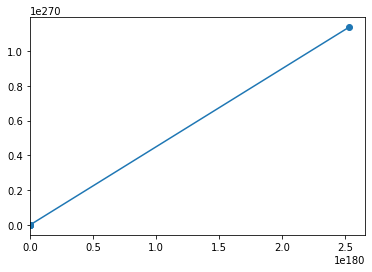

In [43]:
np.random.seed(20)
traj = grad_descent(iterations=100, learning_rate=1)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


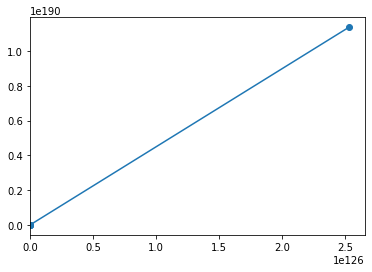

In [44]:
np.random.seed(20)
traj = grad_descent(iterations=100, learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y, '-o')

**2.4**

In [45]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    
    if starting_point is None:
        point = np.random.uniform(-10, 10, size = 2)
    else:
        point = starting_point
        
    traj = [point]
    v = np.zeros(point.size)
    for _ in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        traj.append(point)
    return np.array(traj)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


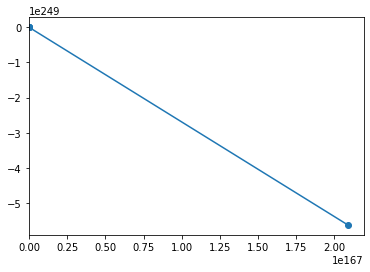

In [46]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=23, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


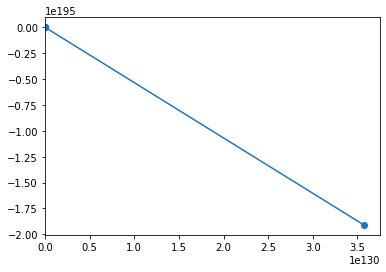

In [47]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=1, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


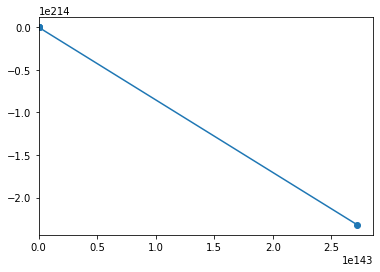

In [48]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100, epsilon=3, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

**3.1 & 3.2**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [50]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))
    


In [51]:
W = np.random.randn(8).reshape((4,2))
b = np.random.randn(4)
v = np.random.randn(4)
c = np.random.randn(1)

In [52]:
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    dL_dv4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,3])
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]))
    dL_db4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]))

    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw14 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,0])

    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    dL_dw24 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14, dL_dw21, dL_dw22, dL_dw23, dL_dw24,
                     dL_db1, dL_db2, dL_db3, dL_db4, dL_dv1, dL_dv2, dL_dv3, dL_dv4,dL_dc])

**3.3**

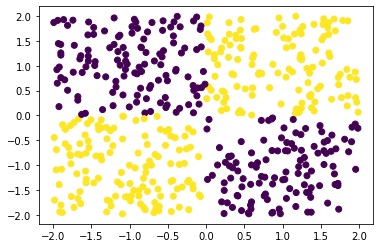

In [53]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

**3.4**

In [56]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

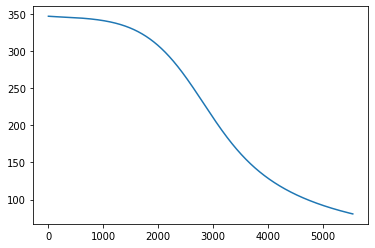

In [57]:
traj, losses = grad_descent(x, y, iterations=5550,learning_rate=1e-2)
plt.plot(losses)

**3.5**

In [92]:
def grad_descent_with_mom(x, y,  iterations=10, epsilon=-2, alpha = 0.9):
    point = np.random.uniform(-.1,.1,size=17).astype("float64")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

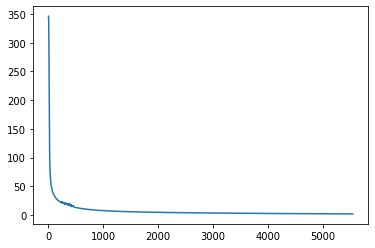

In [93]:
traj, losses = grad_descent_with_mom(x, y, iterations=5550, epsilon=-2, alpha=.5 )
plt.plot(losses)

**3.6**

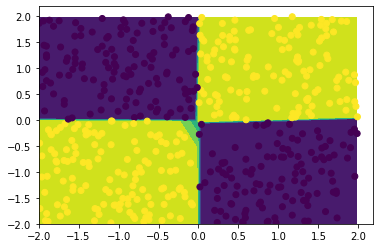

In [94]:
delta = 0.025
x1 = np.arange(-2.0, 2.0,  delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)